<a href="https://colab.research.google.com/github/binodlk/organic_classifier_model/blob/main/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my first binary classification cnn model using tensorflow

This have only a small dataset
Training set = 23 * 2
Test set = 7 * 2

:')

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [2]:
img = image.load_img("/content/drive/MyDrive/deep/data/train/ali_train_set/aliphatic02.PNG")

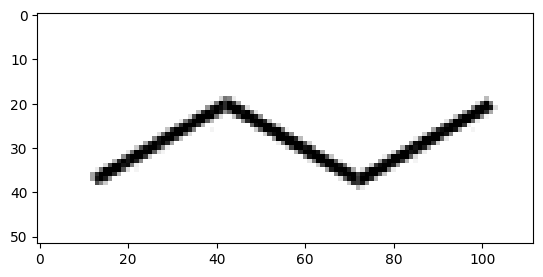

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("/content/drive/MyDrive/deep/data/train/ali_train_set/aliphatic02.PNG").shape

(52, 112, 3)

In [5]:
#rescaling images for vector
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [8]:
#creating a dataset for train
train_dataset = train.flow_from_directory("/content/drive/MyDrive/deep/data/train/",
                                          target_size = (150,150),
                                          batch_size = 4,
                                          class_mode = "binary")

#creating a dataset for train
test_dataset = train.flow_from_directory("/content/drive/MyDrive/deep/data/test/",
                                          target_size = (150,150),
                                          batch_size = 4,
                                          class_mode = "binary")


Found 43 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [9]:
#checking the assigned values for the two classes
train_dataset.class_indices

{'ali_train_set': 0, 'aro_train_set': 1}

In [16]:
#defining the model
model = tf.keras.models.Sequential([#cnvlayer_01
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #cnvlayer_02
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #cnvlayer_03
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #nlayer01
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    #nlayer02
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    #nlayer03
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    #nlayer04
                                    tf.keras.layers.Dense(64,activation = 'relu'),
                                    #output
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')

                                    ])

In [17]:
from keras.optimizers.legacy.rmsprop import RMSProp
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSProp(learning_rate=0.001),
              metrics = ["accuracy"])

In [18]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch= 5,
                      epochs = 30,
                      validation_data = test_dataset)

Epoch 1/30
5/5 [==============================] - 2s 142ms/step - loss: 1.5044 - accuracy: 0.4500 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 1s 108ms/step - loss: 0.8824 - accuracy: 0.4211 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 110ms/step - loss: 0.6893 - accuracy: 0.5789 - val_loss: 1.0347 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 110ms/step - loss: 0.6647 - accuracy: 0.6842 - val_loss: 0.7071 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 1s 108ms/step - loss: 0.8846 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 1s 106ms/step - loss: 0.7088 - accuracy: 0.5263 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 1s 109ms/step - loss: 0.6761 - accuracy: 0.6316 - val_loss: 0.7686 - val_accuracy: 0.5000
Epoch 8/30
5/5 [====

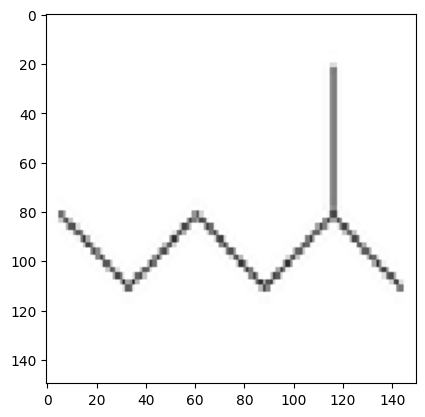

1/1 [==============================] - 0s 97ms/step
This is an aromatic molecule


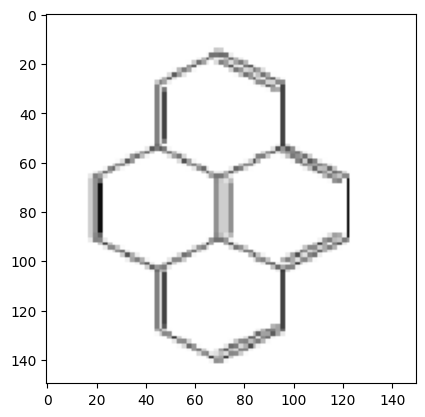

1/1 [==============================] - 0s 21ms/step
This is an aromatic molecule


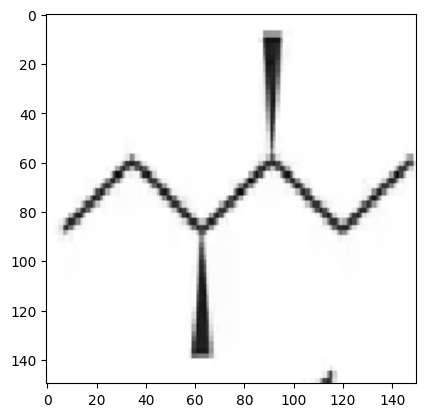

1/1 [==============================] - 0s 22ms/step
This is an aliphatic molecule


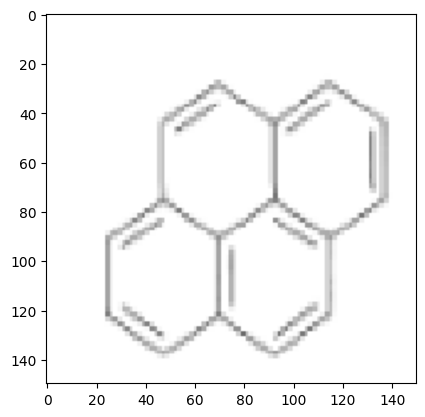

1/1 [==============================] - 0s 22ms/step
This is an aromatic molecule


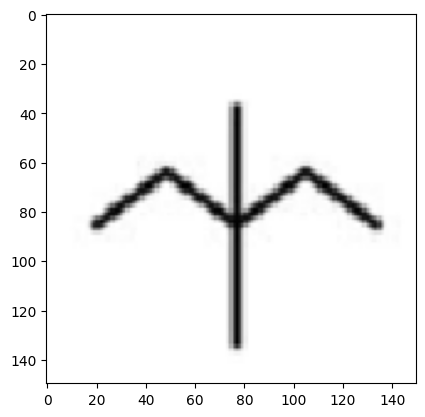

1/1 [==============================] - 0s 21ms/step
This is an aromatic molecule


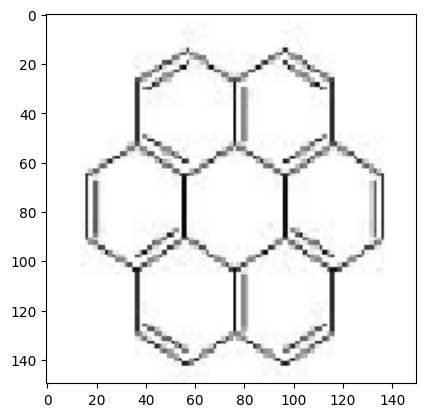

1/1 [==============================] - 0s 24ms/step
This is an aromatic molecule


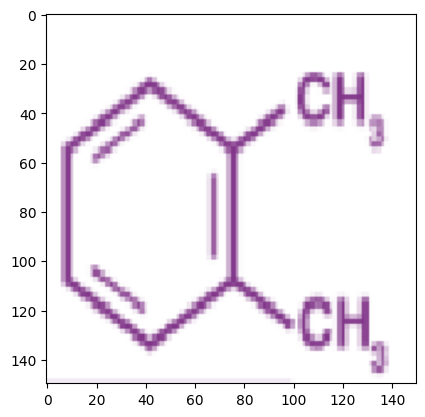

1/1 [==============================] - 0s 20ms/step
This is an aromatic molecule


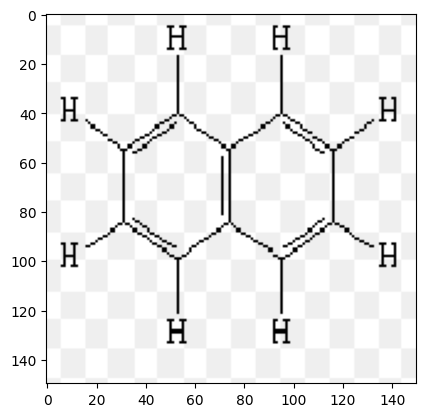

1/1 [==============================] - 0s 20ms/step
This is an aliphatic molecule


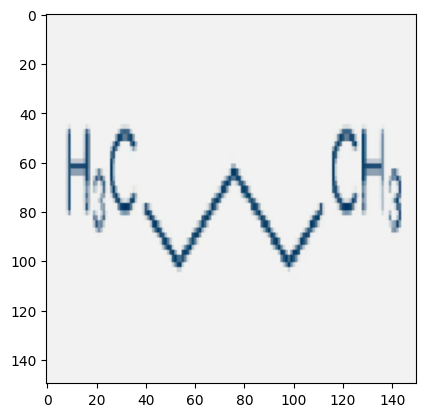

1/1 [==============================] - 0s 20ms/step
This is an aliphatic molecule


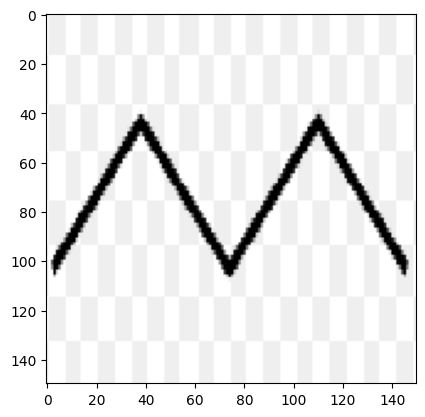

1/1 [==============================] - 0s 20ms/step
This is an aliphatic molecule


In [19]:
#checking the data
dir_path = "/content/drive/MyDrive/deep/data/validation/"

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i, target_size = (150,150))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images_array = np.vstack([x])

  pred_val = model.predict(images_array)
  if pred_val == 0:
    print('This is an aliphatic molecule')
  else:
    print("This is an aromatic molecule")
